In [8]:
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import os

In [9]:
import pathlib

flower_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_path = tf.keras.utils.get_file('flower_photos',origin=flower_dataset,untar=True)
dataset_path = pathlib.Path(dataset_path)

228827136/228813984 [==============================] - 1s 0us/step


In [10]:
roses = list(dataset_path.glob('roses/*'))
daisy = list(dataset_path.glob('daisy/*'))
print(roses[1])

/root/.keras/datasets/flower_photos/roses/921138131_9e1393eb2b_m.jpg


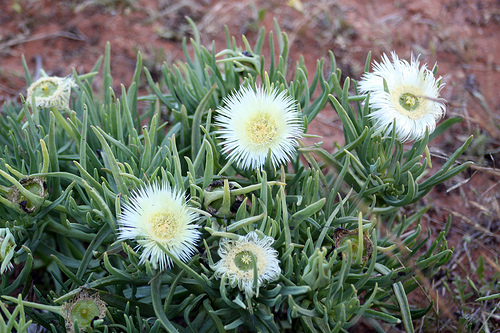

In [11]:
PIL.Image.open(roses[10])
PIL.Image.open(daisy[10])

In [12]:
# training the dataset 

training_images = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    subset = "training",
    validation_split = 0.25,
    seed = 123,
    image_size = (180, 180),
    batch_size = 32

)

Found 3670 files belonging to 5 classes.
Using 2753 files for training.


In [13]:
# validation of images


validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    subset = "validation",
    validation_split = 0.25,
    seed = 123,
    image_size = (180, 180),
    batch_size = 32

)

Found 3670 files belonging to 5 classes.
Using 917 files for validation.


In [14]:
flower_classes = training_images.class_names
print(flower_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [15]:
from tensorflow.python.framework.func_graph import flatten
# if there are 5 classes then

dataset_classes = 5

from tensorflow.keras.models import Sequential

model = Sequential([
      #rescaling
      layers.experimental.preprocessing.Rescaling(1./255, input_shape = (180,180,3)),
      layers.Conv2D(16, 3 , padding='same' ,  activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding ='same' , activation = 'relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64 , 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(dataset_classes, activation='softmax')
])

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [17]:
mymodel = model.fit(
    training_images,
    validation_data=validation_images,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


87/87 [==============================] - 94s 1s/step - loss: 1.4743 - accuracy: 0.3632 - val_loss: 1.2019 - val_accuracy: 0.4820
Epoch 2/10
87/87 [==============================] - 92s 1s/step - loss: 1.0394 - accuracy: 0.5812 - val_loss: 1.0650 - val_accuracy: 0.5932
Epoch 3/10
87/87 [==============================] - 92s 1s/step - loss: 0.8615 - accuracy: 0.6753 - val_loss: 1.0460 - val_accuracy: 0.6140
Epoch 4/10
87/87 [==============================] - 91s 1s/step - loss: 0.7050 - accuracy: 0.7381 - val_loss: 1.1760 - val_accuracy: 0.5431
Epoch 5/10
87/87 [==============================] - 91s 1s/step - loss: 0.4431 - accuracy: 0.8467 - val_loss: 1.1191 - val_accuracy: 0.6150
Epoch 6/10
87/87 [==============================] - 91s 1s/step - loss: 0.2788 - accuracy: 0.9056 - val_loss: 1.2900 - val_accuracy: 0.6096
Epoch 7/10
87/87 [==============================] - 91s 1s/step - loss: 0.1500 - accuracy: 0.9546 - val_loss: 1.5440 - val_accuracy: 0.6281
Epoch 8/10
87/87 [=============

In [18]:
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {flower_classes[i]: float(prediction[i]) for i in range(5)}

In [19]:
! pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import gradio as gr
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {flower_classes[i]: float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://21826.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
